In [1]:
import gensim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn.preprocessing
from sklearn.manifold import SpectralEmbedding

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

C:\Users\etodorov\anaconda3\envs\tf1\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
from spectral_embedding import spec_emd
from diffusions_maps import diffusion_map

In [13]:
w = gensim.models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True)

In [28]:
new_size = 20000
ww = np.zeros((new_size, 300))
for i in range(new_size):
    ww[i] = w[i]

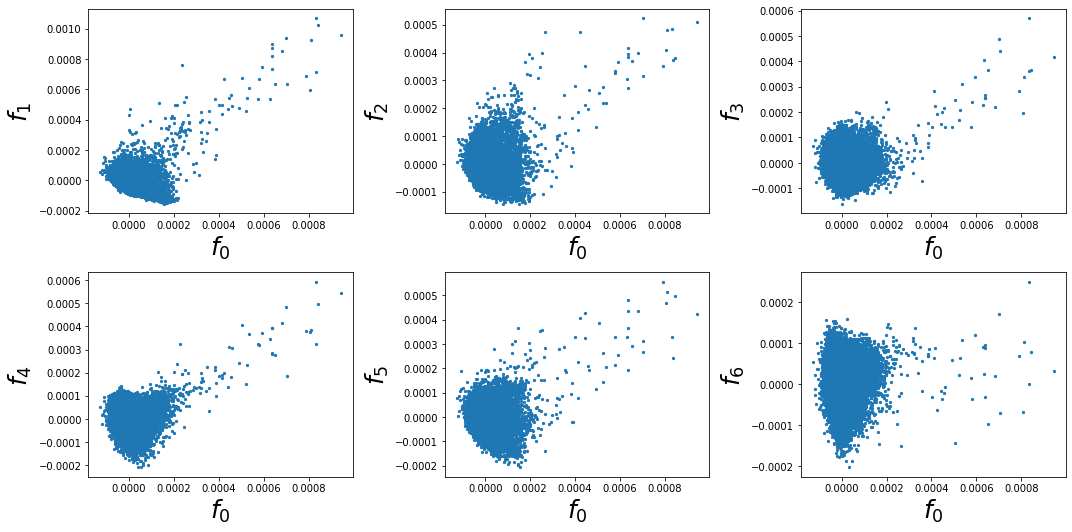

In [30]:
width = 2
height = 3
fig = plt.figure(figsize=(7.5*width,2.5*height))
ax = fig.subplots(width, height)
j = 0
i = 0

for k in range(1,7):
    #ax[i][j].scatter(spectral_swiss_data.T[0], spectral_swiss_data.T[k], s=5, c=t_swiss, cmap='winter')
    ax[i][j].scatter(ww_se[:,0], ww_se[:,k], s=5)

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    ax[i][j].set_xlabel(r'$f_0$', fontsize = 25)
    ax[i][j].set_ylabel(fr'$f_{k}$', fontsize = 25)
    ax[i][j].tick_params(axis='both', labelsize = 10)


    j +=1
    if (j == height):
        j = 0
        i += 1

fig.tight_layout()

In [ ]:
X_pcm = pfold.PCManifold(ww)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

In [ ]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=10,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15])
)

In [ ]:
w.vector_size, w.key_to_index['mother'], w.key_to_index['father']

In [ ]:
plt.scatter(range(w.vector_size),w['mother'])

In [ ]:
x = []
y = []
for i in range(3000):
    x.append(w[i][0])
    y.append(w[i][1])
plt.scatter(x,y)

In [ ]:
w.most_similar(w['father'])

In [ ]:
w.similar_by_vector(w['father']-w['woman']+w['man'])

In [5]:
poker = pd.read_csv('pmlb/poker/poker.tsv.gz',sep='\t')
poker.shape

(1025010, 11)

In [9]:
poker.values[np.array([1,2,3])]

array([[ 3, 12,  3,  2,  3, 11,  4,  5,  2,  5,  1],
       [ 1,  9,  4,  6,  1,  4,  3,  2,  3,  9,  1],
       [ 1,  4,  3, 13,  2, 13,  2,  1,  3,  6,  1]], dtype=int64)

In [22]:
np.random.seed(42)
ixs = np.random.randint(low=0, high=len(poker), size=20000)
poker_short = poker.values[ixs,:-1]/13
poker_class = poker.values[ixs,-1]

In [23]:
poker

array([ 121958,  671155,  131932, ...,  888640,  146539, 1015059])

In [24]:
poker_short, poker_class

(array([[0.30769231, 0.38461538, 0.15384615, ..., 0.07692308, 0.07692308,
         0.15384615],
        [0.23076923, 0.38461538, 0.07692308, ..., 0.46153846, 0.30769231,
         0.61538462],
        [0.15384615, 0.23076923, 0.30769231, ..., 0.07692308, 0.07692308,
         0.38461538],
        ...,
        [0.23076923, 0.38461538, 0.30769231, ..., 0.53846154, 0.30769231,
         0.53846154],
        [0.15384615, 0.38461538, 0.30769231, ..., 0.15384615, 0.23076923,
         0.92307692],
        [0.07692308, 0.15384615, 0.15384615, ..., 0.76923077, 0.07692308,
         0.53846154]]),
 array([0, 1, 1, ..., 1, 0, 1], dtype=int64))

In [25]:
X_pcm = pfold.PCManifold(poker_short)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.008673040688896306, cut-off = 0.3997040325158949


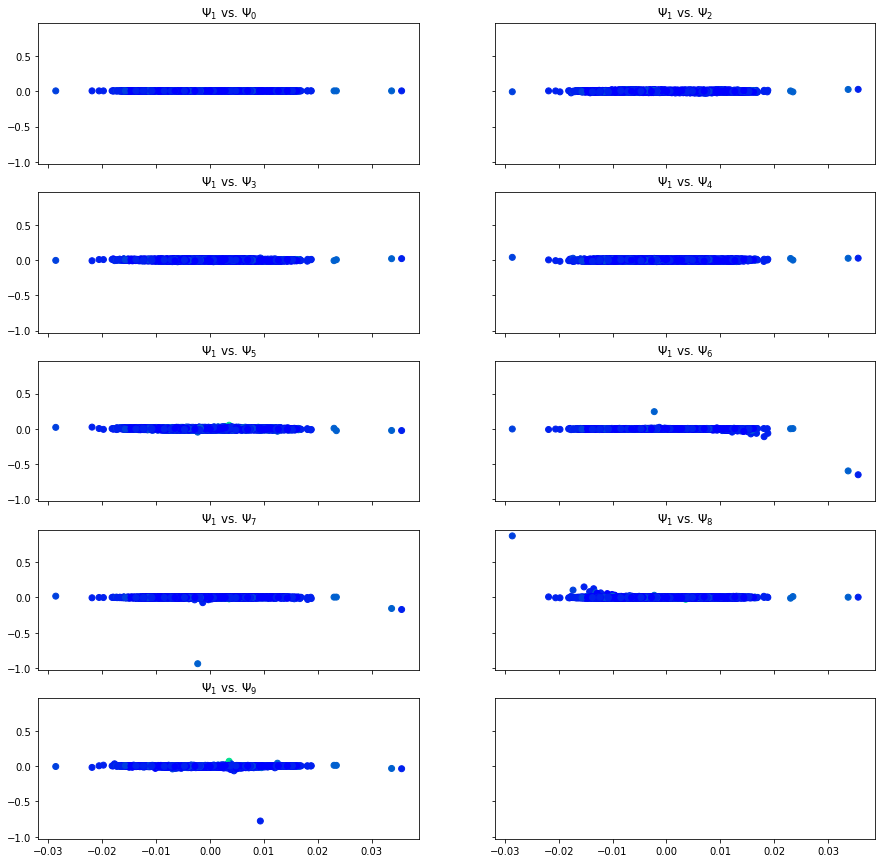

In [26]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=10,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
     scatter_params=dict(c=poker_class, cmap='winter')
)

In [29]:
poker_se = SpectralEmbedding(n_components=7, affinity = 'nearest_neighbors', eigen_solver = "arpack").fit_transform(poker_short)

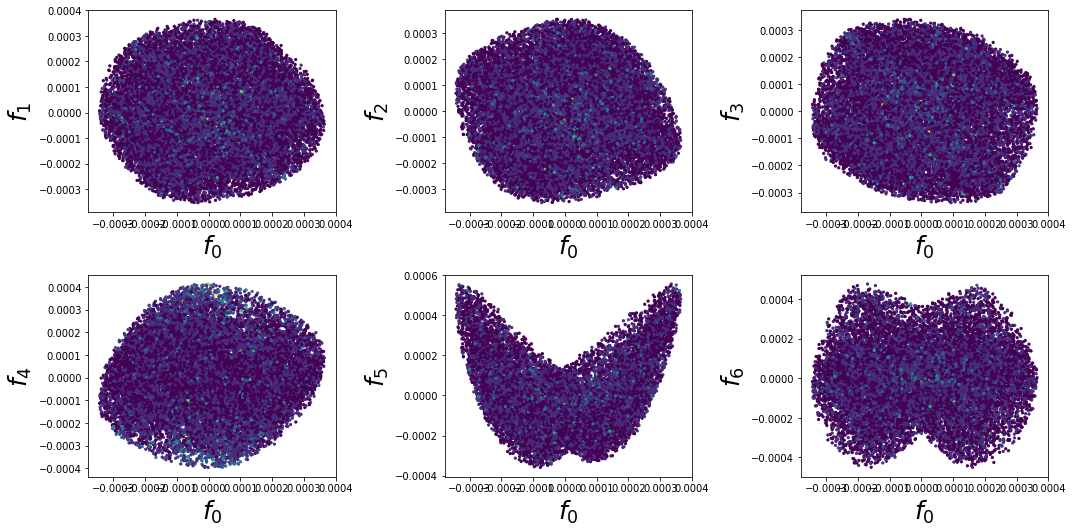

In [30]:
width = 2
height = 3
fig = plt.figure(figsize=(7.5*width,2.5*height))
ax = fig.subplots(width, height)
j = 0
i = 0

for k in range(1,7):
    #ax[i][j].scatter(spectral_swiss_data.T[0], spectral_swiss_data.T[k], s=5, c=t_swiss, cmap='winter')
    ax[i][j].scatter(poker_se[:,0], poker_se[:,k], s=5, c=poker_class)

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    ax[i][j].set_xlabel(r'$f_0$', fontsize = 25)
    ax[i][j].set_ylabel(fr'$f_{k}$', fontsize = 25)
    ax[i][j].tick_params(axis='both', labelsize = 10)


    j +=1
    if (j == height):
        j = 0
        i += 1

fig.tight_layout()

In [3]:
magic = pd.read_csv('pmlb/magic/magic.tsv.gz', sep='\t')
magic_data = magic.values[:,:-1]
magic_label = magic.values[:,-1]

In [35]:
magic_se = SpectralEmbedding(n_components=7, n_neighbors=10, affinity = 'nearest_neighbors', eigen_solver = "arpack").fit_transform(magic_data)

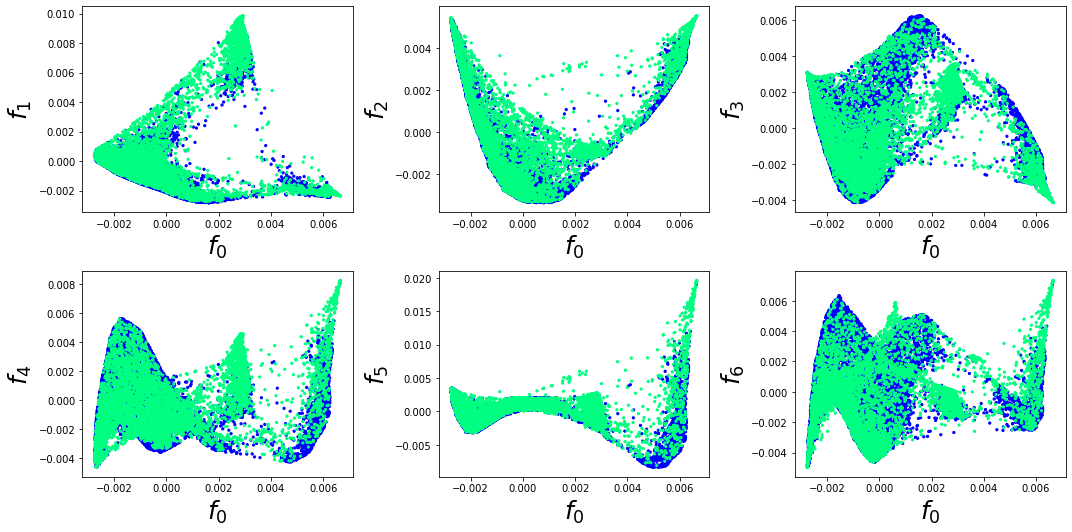

In [41]:
width = 2
height = 3
fig = plt.figure(figsize=(7.5*width,2.5*height))
ax = fig.subplots(width, height)
j = 0
i = 0

for k in range(1,7):
    #ax[i][j].scatter(spectral_swiss_data.T[0], spectral_swiss_data.T[k], s=5, c=t_swiss, cmap='winter')
    ax[i][j].scatter(magic_se[:,0], magic_se[:,k], s=5, c=magic_label, cmap='winter')

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    ax[i][j].set_xlabel(r'$f_0$', fontsize = 25)
    ax[i][j].set_ylabel(fr'$f_{k}$', fontsize = 25)
    ax[i][j].tick_params(axis='both', labelsize = 10)


    j +=1
    if (j == height):
        j = 0
        i += 1

fig.tight_layout()

In [19]:
magic_se2 = SpectralEmbedding(n_components=7, affinity = 'nearest_neighbors', eigen_solver = "arpack").fit_transform(magic_data)

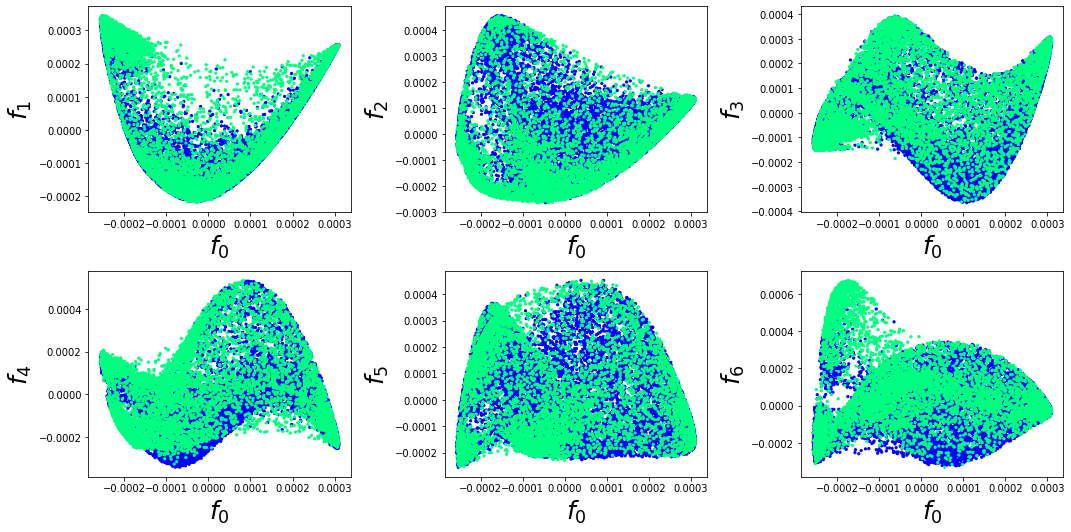

In [40]:
width = 2
height = 3
fig = plt.figure(figsize=(7.5*width,2.5*height))
ax = fig.subplots(width, height)
j = 0
i = 0

for k in range(1,7):
    #ax[i][j].scatter(spectral_swiss_data.T[0], spectral_swiss_data.T[k], s=5, c=t_swiss, cmap='winter')
    ax[i][j].scatter(magic_se2[:,0], magic_se2[:,k], s=5, c=magic_label, cmap='winter')

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    ax[i][j].set_xlabel(r'$f_0$', fontsize = 25)
    ax[i][j].set_ylabel(fr'$f_{k}$', fontsize = 25)
    ax[i][j].tick_params(axis='both', labelsize = 10)


    j +=1
    if (j == height):
        j = 0
        i += 1

fig.tight_layout()

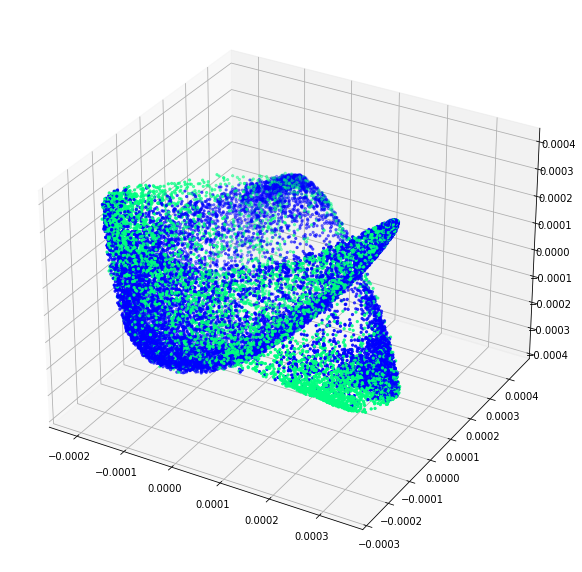

In [31]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(magic_se2[:,1], magic_se2[:,2],  magic_se2[:,3], s=5, c=magic_label, cmap='winter')

In [70]:
magic_short = magic_data[1::3]

In [71]:
magic_short

array([[ 31.6036,  11.7235,   2.5185, ...,  -9.9574,   6.3609, 205.261 ],
       [ 75.1362,  30.9205,   3.1611, ...,  21.8393,   4.648 , 356.462 ],
       [ 26.7897,  13.7595,   2.5521, ...,  -2.9292,   0.812 , 237.134 ],
       ...,
       [ 31.8373,  13.8734,   2.8251, ...,  11.1098,  11.3663, 100.0566],
       [ 21.3846,  10.917 ,   2.6161, ...,   2.8766,   2.4229, 106.8258],
       [120.5135,  76.9018,   3.9939, ..., -63.8389,  84.6874, 408.3166]])

In [42]:
magic_pcm = pfold.PCManifold(magic_data)
magic_pcm.optimize_parameters()

print(f"epsilon = {magic_pcm.kernel.epsilon}, cut-off = {magic_pcm.cut_off}")
magic_dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=magic_pcm.kernel.epsilon),
    n_eigenpairs=7,
    dist_kwargs=dict(cut_off=magic_pcm.cut_off),
)
magic_dmap = magic_dmap.fit(magic_pcm)
evecs, evals = magic_dmap.eigenvectors_, dmap.eigenvalues_
plot_pairwise_eigenvector(
    eigenvectors=magic_dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
     scatter_params=dict(c=magic_label, cmap='winter')
)

epsilon = 1757.9688758848713, cut-off = 179.95272551556434


MemoryError: bad allocation

epsilon = 7124.807585507295, cut-off = 362.2758698764244


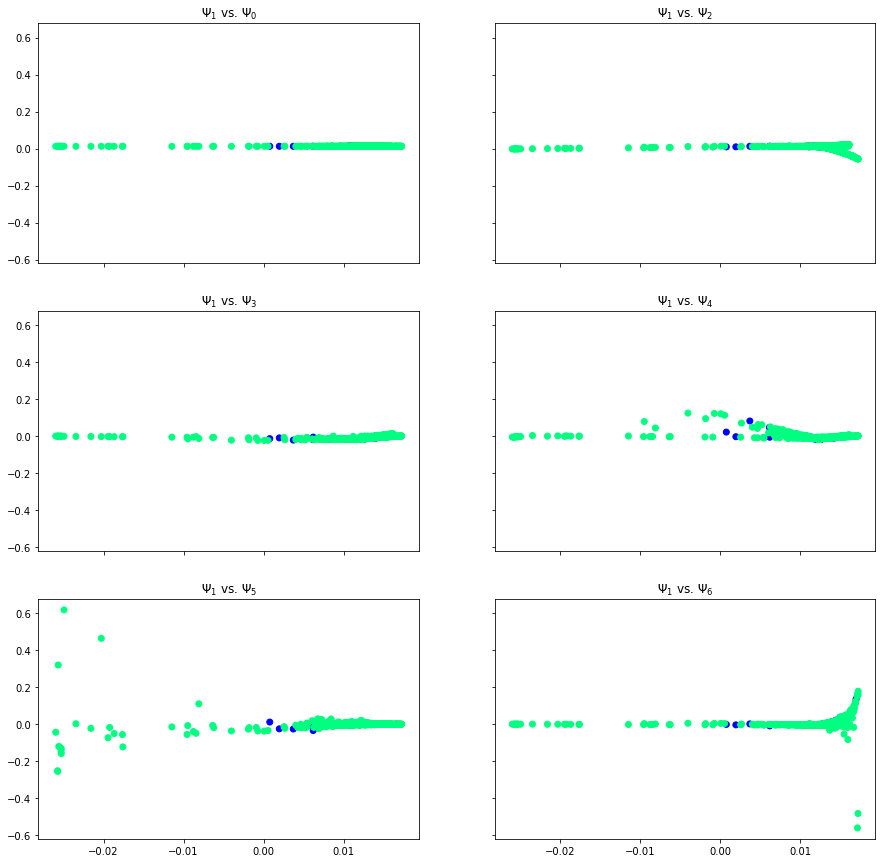

In [72]:
magic_pcm = pfold.PCManifold(magic_short)
magic_pcm.optimize_parameters()

print(f"epsilon = {magic_pcm.kernel.epsilon}, cut-off = {magic_pcm.cut_off}")
magic_dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=magic_pcm.kernel.epsilon),
    n_eigenpairs=7,
    dist_kwargs=dict(cut_off=magic_pcm.cut_off),
)
magic_dmap = magic_dmap.fit(magic_pcm)
evecs, evals = magic_dmap.eigenvectors_, dmap.eigenvalues_
plot_pairwise_eigenvector(
    eigenvectors=magic_dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
     scatter_params=dict(c=magic_label[::3], cmap='winter')
)

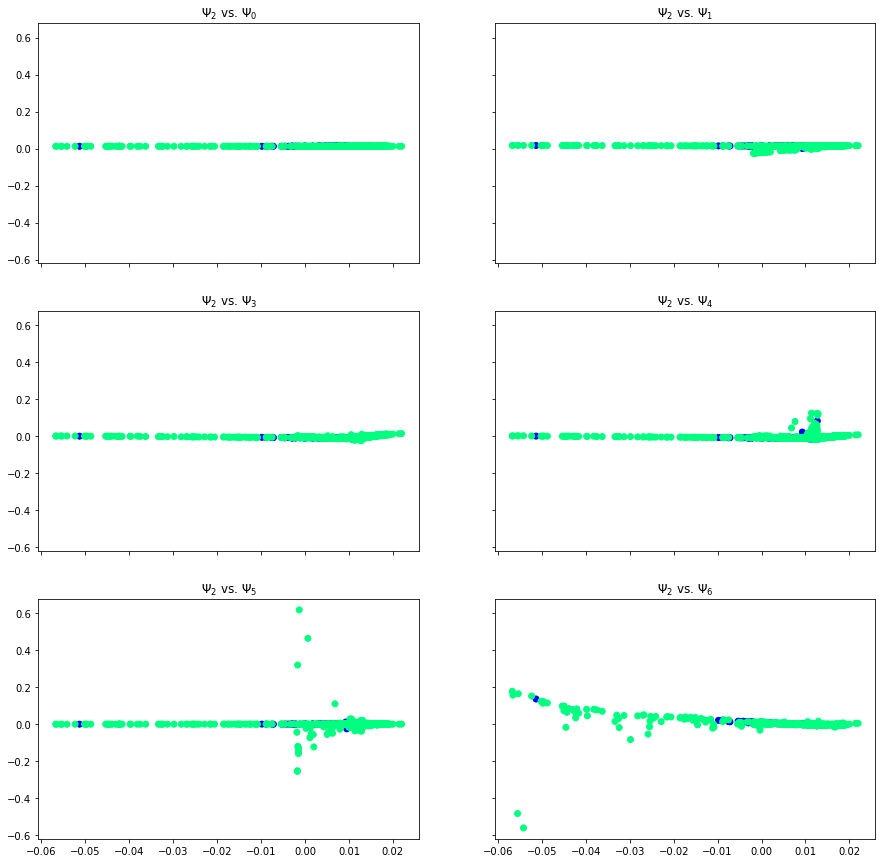

In [73]:
plot_pairwise_eigenvector(
    eigenvectors=magic_dmap.eigenvectors_,
    n=2,
    fig_params=dict(figsize=[15, 15]),
     scatter_params=dict(c=magic_label[1::3], cmap='winter')
)

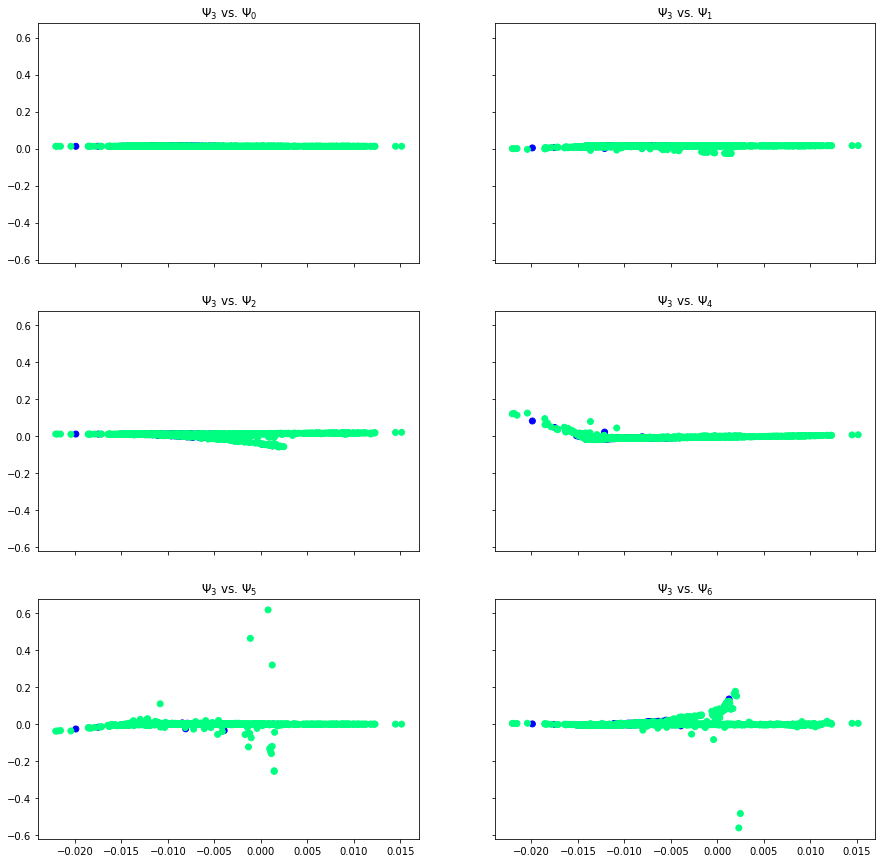

In [74]:
plot_pairwise_eigenvector(
    eigenvectors=magic_dmap.eigenvectors_,
    n=3,
    fig_params=dict(figsize=[15, 15]),
     scatter_params=dict(c=magic_label[1::3], cmap='winter')
)

In [66]:
magic_label[1::3].max()

1.0

In [4]:
dm_magic_eigval, dm_magic_eigvec = diffusion_map(magic_data[1::3], 10)

KeyboardInterrupt: 

In [ ]:
dm_magic_eigvec_flipped = np.fliplr(dm_magic_eigvec) # Flip to get in order of decending λ
hor_axis_eigen = dm_magic_eigvec_flipped.T[1]
for i in range(2, 10):
    plt.figure()
    plt.scatter(hor_axis_eigen, dm_magic_eigvec_flipped[:,i], s=5, c=magic_label[1::3], cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

In [16]:
magic_se_custom = spec_emd(magic_data[3::10], 7)

ArpackNoConvergence: ARPACK error -1: No convergence (19021 iterations, 3/8 eigenvectors converged)

In [ ]:
width = 2
height = 3
fig = plt.figure(figsize=(7.5*width,2.5*height))
ax = fig.subplots(width, height)
j = 0
i = 0

for k in range(1,7):
    #ax[i][j].scatter(spectral_swiss_data.T[0], spectral_swiss_data.T[k], s=5, c=t_swiss, cmap='winter')
    ax[i][j].scatter(magic_se_custom[:,0], magic_se_custom[:,k], s=5, c=magic_label[::100], cmap='winter')

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

    ax[i][j].set_xlabel(r'$f_0$', fontsize = 25)
    ax[i][j].set_ylabel(fr'$f_{k}$', fontsize = 25)
    ax[i][j].tick_params(axis='both', labelsize = 10)


    j +=1
    if (j == height):
        j = 0
        i += 1

fig.tight_layout()

In [ ]:
%timeit SpectralEmbedding(n_components=7, affinity = 'nearest_neighbors', eigen_solver = "arpack").fit_transform(magic_data)

In [ ]:
%timeit SpectralEmbedding(n_components=7, affinity = 'nearest_neighbors', eigen_solver = "lobpcg").fit_transform(magic_data)